In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_kit as erk
import pandas as pd
import numpy as np

In [19]:
ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["2013":"2017"], 12)
cov = ind["2013":"2017"].cov()

C:\Users\m1852\python\py312\Scripts\edhec_risk_kit.py:87: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ind = pd.read_csv("data/ind30_m_vw_rets.csv", header = 0, index_col = 0, parse_dates = True)/100


In [20]:
l = ["Books","Steel","Oil","Mines"]
erk.msr(0.1, er[l], cov.loc[l,l])

array([0.00000000e+00, 1.00000000e+00, 6.00214323e-16, 7.35522754e-16])

In [18]:
l = ["Food", "Steel"]
erk.msr(0.1, er[l], cov.loc[l,l])

array([0.75040362, 0.24959638])

In [15]:
er[l]

Food     0.116799
Steel    0.115809
dtype: float64

In [32]:
cov.loc[l,l]

,Food,Steel
Food,0.002609,0.00007
Steel,0.000070,0.00723


In [17]:
erk.msr(0.1, np.array([.11, .12]), cov.loc[l,l])

array([0.57930354, 0.42069646])

<Axes: xlabel='Volatility'>

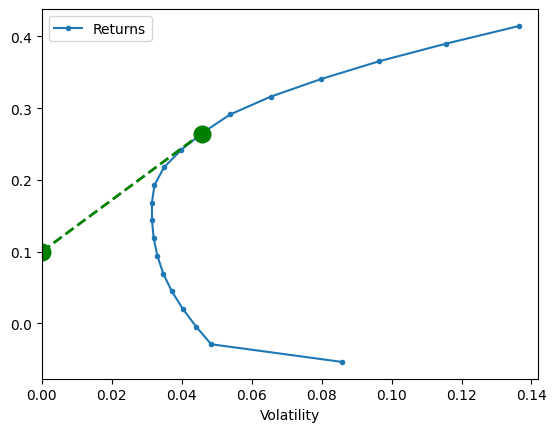

In [19]:
erk.plot_ef(20, er, cov, show_cml = True, riskfree_rate = 0.1)

In [30]:
def gmv(cov):
    '''
    returns the weights of the global minimum vol portfolio given the covariance matrix
    '''
    n = cov.shape[0]
    return msr(0, np.repeat(1, n), cov)

def plot_ef(n_points, er, cov, show_cml = False, style = ".-", riskfree_rate = 0, show_ew = False, show_gmv = False):
   
    weights = optimal_weights(n_points, er, cov)
    rets = [portfolio_return(w, er) for w in weights]
    vols = [portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame({
        "Returns": rets, 
        "Volatility": vols
    })
    ax = ef.plot.line(x = "Volatility", y = "Returns", style = style)

    if show_gmv:
        w_gmv = gmv(cov)
        r_gmv = portfolio_return(w_gmv, er)
        vol_gmv = portfolio_vol(w_gmv, cov)
        ax.plot([vol_gmv], [r_gmv], color = "midnightblue", marker = "o", markersize = 10)
        
    
    if show_ew: 
        n = er.shape[0]
        w_ew = np.repeat(1/n, n)
        r_ew = portfolio_return(w_ew, er)
        vol_ew = portfolio_vol(w_ew, cov)
        ax.plot([vol_ew], [r_ew], color = "goldenrod", marker = "o", markersize = 10)
        
    if show_cml:
        ax.set_xlim(left = 0)
        w_msr = msr(riskfree_rate, er, cov)
        r_msr = portfolio_return(w_msr, er)
        vol_msr = portfolio_vol(w_msr, cov)
        
        cml_x = [0, vol_msr]
        cml_y = [riskfree_rate, r_msr]
        ax.plot(cml_x, cml_y, color = "green", marker = "o", linestyle = "dashed", markersize = 12, linewidth = 2)
    return ax

<Axes: xlabel='Volatility'>

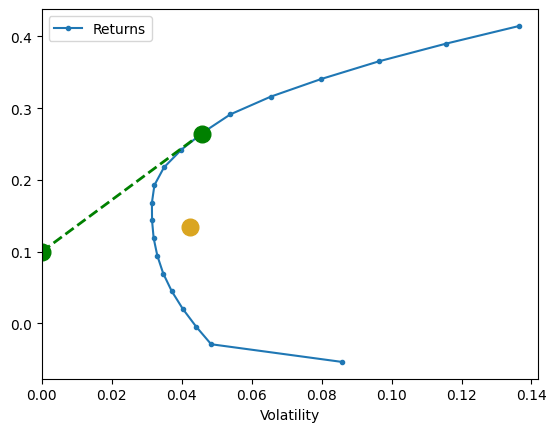

In [23]:
erk.plot_ef(20, er, cov, show_cml = True, riskfree_rate = 0.1, show_ew = True)

<Axes: xlabel='Volatility'>

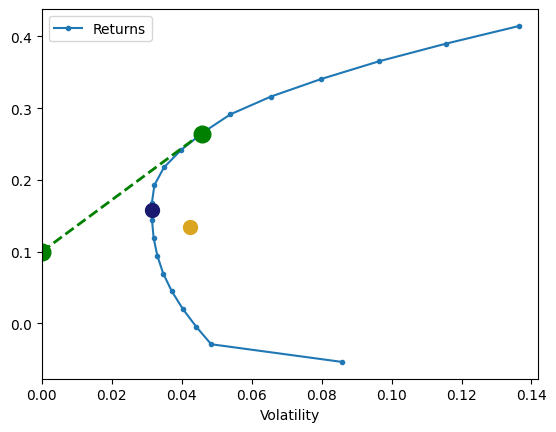

In [31]:
erk.plot_ef(20, er, cov, show_cml = True, riskfree_rate = 0.1, show_ew = True, show_gmv = True)